In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/sample_data/diabetes (1).csv')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,767.000000,768.000000,767.000000,768.000000,768.000000,768.000000,767.000000,768.000000
mean,3.845052,120.921773,69.105469,20.524120,79.799479,31.992578,0.471876,33.228162,0.348958
std,3.369578,31.984561,19.355807,15.958959,115.244002,7.884160,0.331329,11.762615,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     1
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [ ]:
data = df.dropna()

In [ ]:
data= data.drop_duplicates()

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               765 non-null    int64  
 1   Glucose                   765 non-null    float64
 2   BloodPressure             765 non-null    int64  
 3   SkinThickness             765 non-null    float64
 4   Insulin                   765 non-null    int64  
 5   BMI                       765 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       765 non-null    float64
 8   Outcome                   765 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 59.8 KB


In [ ]:
data.shape

(765, 9)

In [ ]:
for col in data.columns:
    print(data[col].value_counts())

1     134
0     111
2     103
3      75
4      68
5      57
6      50
7      43
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
99.0     17
100.0    16
129.0    14
106.0    14
111.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64
70     56
74     52
78     45
68     45
72     44
64     43
80     40
76     38
60     37
0      34
62     34
66     30
82     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64
0.0     225
32.0     31
30.0     26
27.0     23
23.0     22
28.0     20
18.0     20
33.0     20
31.0     19
19.0     18
3

In [ ]:
import plotly.express as px
fig= px.box(data, y= ['Pregnancies', 'Glucose  ', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age'])
fig.show()

In [ ]:
#outlier calculation
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q1-Q3
((data < (Q1-1.5*IQR))|(data > (Q3-1.5*IQR))).sum()

Pregnancies                 683
Glucose                     664
BloodPressure               712
SkinThickness               747
Insulin                     703
BMI                         692
DiabetesPedigreeFunction    697
Age                         685
Outcome                     765
dtype: int64

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,0,33.6,0.627,50.0,1
1,1,85.0,66,29.0,0,26.6,0.351,31.0,0
2,8,183.0,64,0.0,0,23.3,0.672,32.0,1
3,1,89.0,66,23.0,94,28.1,0.167,21.0,0
4,0,137.0,40,35.0,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180,32.9,0.171,63.0,0
764,2,122.0,70,27.0,0,36.8,0.340,27.0,0
765,5,121.0,72,23.0,112,26.2,0.245,30.0,0
766,1,126.0,60,0.0,0,30.1,0.349,47.0,1


In [ ]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
print(y_train.value_counts())

0    400
1    212
Name: Outcome, dtype: int64


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
standardized_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
np.unique(y_test)

array([0, 1])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_NB = MultinomialNB()
model_NB.fit(X_train,y_train)
NB =model_NB.score(X_test,y_test)
NB

0.5882352941176471

In [ ]:
nb_predicted = model_NB.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, nb_predicted)
print(cf_matrix)

[[69 31]
 [32 21]]


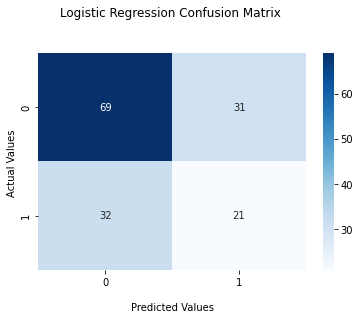

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Logistic Regression Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_predicted))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       100
           1       0.40      0.40      0.40        53

    accuracy                           0.59       153
   macro avg       0.54      0.54      0.54       153
weighted avg       0.59      0.59      0.59       153



In [ ]:
#KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_k= KNeighborsClassifier()
model_k.fit(X_train,y_train)
KNN =model_k.score(X_test,y_test)
KNN

0.7450980392156863

In [ ]:
k_predicted = model_k.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, k_predicted)
print(cf_matrix)

[[80 20]
 [19 34]]


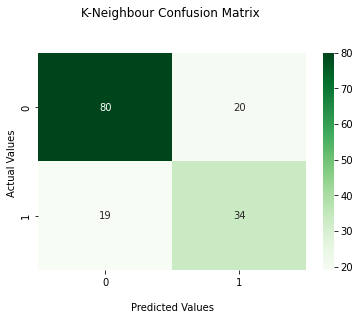

In [ ]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')
ax.set_title('K-Neighbour Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,k_predicted))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.63      0.64      0.64        53

    accuracy                           0.75       153
   macro avg       0.72      0.72      0.72       153
weighted avg       0.75      0.75      0.75       153



In [ ]:
data={
    'Algorithm_name': ['Naive Bayes', 'KNN Classifier'],
    'Accuracy': [NB,KNN],
}
ds = pd.DataFrame(data)
ds

,Algorithm_name,Accuracy
0,Naive Bayes,0.588235
1,KNN Classifier,0.745098


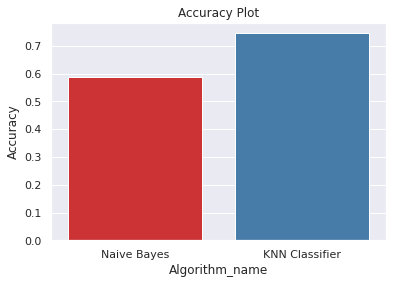

In [ ]:
sns.set()
sns.barplot(x='Algorithm_name', y='Accuracy', data=ds, palette="Set1").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(20,10)})

K-NN classifier provide best performance on that data set